# 미분계수 구하기

아래와 같은 간단한 함수 $f(x)$에 대하여 $x=3$에서 미분계수를 구하는 함수는?

$f(x) = e^x + 5x^2 -6x -5$

In [23]:
import numpy as np

def f(x):
    return np.exp(x) + 5*x**2 -6 *x -5

def derivative(a, h = 1e-6):
    return (f(a+h) - f(a)) / h 

print(derivative(3))

44.0855519627803


sympy의 diff() method를 이용하여 위의 결과가 맞는지 확인해보자.

In [24]:
!pip install sympy

In [26]:
from sympy import Derivative
df_dx = D(f, x)
print(df_dx)

SympifyError: Sympify of expression 'could not parse '<function f at 0x14b45b9a0>'' failed, because of exception being raised:
SyntaxError: invalid syntax (<string>, line 1)

# 적분 함수 만들기

위의 함수 $f(x)$의 그래프를 (-2, 2)의 범위에 대하여 도시하고 [1, 2] 영역의 넓이를 구하는 함수 integrate를 구성하시오.

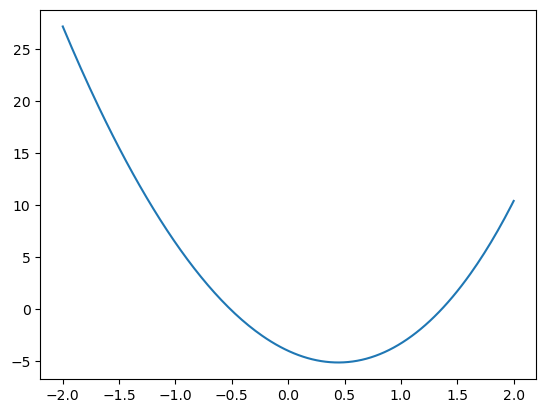

In [4]:
import matplotlib.pyplot as plt

x = np.linspace(-2, 2, 200)
y = f(x)

plt.plot(x, y)

In [5]:
def integrate(func, a, b, N=1000):
    N = 1000
    dx = (b-a) / N
    total_area = 0.0
    
    for i in range(N):
        x0 = a + i*dx
        x1 = a + (i + 1)*dx
        y0 = func(x0)
        y1 = func(x1)
        area = (y0 + y1) * dx / 2.0
        total_area += area
    return total_area

print(integrate(f, 1, 2))

2.3374421597027877


scipy.integrate의 quad method를 import 하여 위의 결과를 재확인하시오.

In [7]:
from scipy.integrate import quad 
print(quad(f, 1, 2))

(2.337440937138272, 4.023726379433235e-14)


# Class 만들고 활용하기 

임의의 함수 $f(x)$를 input으로 하여 특정 $x=a$에서의 미분계수와 a< x < b의 범위에서 정적분 값을 구하는 Calculus class를 만드시오.

In [11]:
class Calculus:
    def __init__(self, F):
        self.F = F
        
        
    def diff(self, a, h = 1e-6):
        return (self.F(a+h) - self.F(a)) / h 

    
    def integrate(self, a, b, N=1000):
        N = 1000
        dx = (b-a) / N
        total_area = 0.0

        for i in range(N):
            x0 = a + i*dx
            x1 = a + (i + 1)*dx
            y0 = self.F(x0)
            y1 = self.F(x1)
            area = (y0 + y1) * dx / 2.0
            total_area += area
        return total_area

In [13]:
def f(x):
    return x**2

f_calc = Calculus(f)
print(f_calc.diff(3))
print(f_calc.integrate(0, 2))

6.000001000927568
2.6666679999999987


# Class 상속하기

위의 Calculus class를 상속한 Calculator class를 만들고 두 값 $a, b$를 넣었을 때 그 합을 구하는 add method를 추가하시오.

In [14]:
class Calculator(Calculus):    
    def add(self, a, b):
        return a + b

In [18]:
X = Calculator(f)
print(X.add(4, 5))
print(X.diff(3))

9
6.000001000927568
